In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# basic plot variales
pd.options.display.max_columns = 100
blue = '#3298D0'
base_color = ['#3298D0', '#d7191c', '#ffffbf']
plot_size = (14, 10)

#load data
DATA_FILE = "Data/nba-players-stats/Seasons_Stats.csv"

# Load data

In [3]:
def load_NBA_data(url):
    return pd.read_csv(url)

nba_data = load_NBA_data(DATA_FILE)

## Data cleaning

In [4]:
#Dataset info
nba_data.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
nba_data = nba_data.drop(columns = ['Unnamed: 0'])

In [6]:
nba_data = nba_data.fillna(0)

In [7]:
# Dates formatting
nba_data['Year'] =  pd.to_datetime(nba_data['Year'])
nba_data['year'] = nba_data['Year'].astype('int64')

In [8]:
nba_data = nba_data.drop(columns = ['Year', 'blanl', 'blank2'])

In [9]:
# New data types
nba_data['Pos'] = nba_data['Pos'].astype('category')
nba_data['Pos'] = nba_data['Pos'].astype('category')

#stats to int32
list_stats_int = ['ORB', 'DRB', 'TRB', 'AST', 
                  'STL', 'BLK', 'TOV', 'PF', 
                  'PTS', '3P', '3P%', 'G', 'Age', 
                  'PTS', 'MP', '3PA']
for ls in list_stats_int:
    nba_data[ls] = nba_data[ls].astype('int32')

In [10]:
nba_data.sample(5)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
21893,Terrel Harris,SG,25,NOH,13,0.0,108,-6.8,0.126,0.368,0.105,0.0,19.1,9.4,8.9,1.0,2.3,39.5,14.2,-0.7,0.1,-0.6,-0.267,-13.0,0.9,-12.0,-0.3,2.0,19.0,0.105,0,7,0,2.0,12.0,0.167,0.105,1.0,2.0,0.500,0,17,17,7,2,3,13,14,5,2013
4318,Kevin Stacom,SG,23,BOS,61,0.0,447,12.0,0.499,0.000,0.208,6.7,5.5,6.1,14.7,1.1,0.3,0.0,0.0,0.4,0.4,0.9,0.092,-1.2,-1.7,-2.9,-0.1,72.0,159.0,0.453,0,0,0,72.0,159.0,0.453,0.453,29.0,33.0,0.879,30,25,55,49,11,3,0,65,173,1975
14991,Brent Barry,SG,29,SEA,67,20.0,1778,16.6,0.660,0.571,0.257,2.1,11.4,6.8,19.4,2.4,0.6,16.2,13.5,4.6,1.2,5.8,0.157,3.5,-0.3,3.2,2.3,198.0,401.0,0.494,109,229,0,89.0,172.0,0.517,0.630,84.0,103.0,0.816,33,178,211,225,80,14,86,126,589,2001
16080,Marcus Camby,C,28,DEN,29,9.0,616,17.5,0.444,0.022,0.220,13.5,26.4,19.7,14.4,1.7,5.2,9.8,19.9,0.3,1.2,1.5,0.119,-1.7,3.7,2.0,0.6,93.0,227.0,0.410,2,5,0,91.0,222.0,0.410,0.414,33.0,50.0,0.660,75,133,208,47,20,40,27,69,221,2003
4464,Gail Goodrich*,SG,32,LAL,75,0.0,2646,17.1,0.495,0.000,0.262,3.5,4.2,3.9,23.4,2.1,0.3,0.0,0.0,3.5,1.5,5.1,0.092,2.1,-1.9,0.2,1.5,583.0,1321.0,0.441,0,0,0,583.0,1321.0,0.441,0.441,293.0,346.0,0.847,94,120,214,421,123,17,0,238,1459,1976


# Filter data from 1980

In [11]:
#select only data since 1980
filtered_data = nba_data[nba_data.year > 1979 ]
filtered_data.sort_values(by='year', ascending = True)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
5727,Kareem Abdul-Jabbar*,C,32,LAL,82,0.0,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0,1,0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190,696,886,371,81,280,297,216,2034,1980
5970,Eric Money,SG,24,DET,55,0.0,1467,11.7,0.539,0.000,0.204,2.0,5.0,3.5,21.8,1.6,0.4,20.5,18.3,0.6,0.2,0.8,0.026,-1.6,-2.7,-4.3,-0.9,259.0,510.0,0.508,0,0,0,259.0,510.0,0.508,0.508,81.0,104.0,0.779,28,69,97,238,53,10,143,135,599,1980
5969,Eric Money,PG,24,PHI,6,0.0,82,4.4,0.407,0.000,0.056,4.1,4.9,4.5,27.2,0.0,0.7,24.5,23.8,-0.2,0.1,-0.2,-0.094,-6.8,-3.9,-10.7,-0.2,14.0,36.0,0.389,0,0,0,14.0,36.0,0.389,0.389,2.0,2.0,1.000,3,4,7,16,0,1,12,11,30,1980
5968,Eric Money,SG-PG,24,TOT,61,0.0,1549,11.4,0.531,0.000,0.194,2.1,5.0,3.5,22.1,1.5,0.4,20.7,18.6,0.4,0.3,0.6,0.020,-1.8,-2.8,-4.7,-1.0,273.0,546.0,0.500,0,0,0,273.0,546.0,0.500,0.500,83.0,106.0,0.783,31,73,104,254,53,11,155,146,629,1980
5967,Sidney Moncrief,SG,22,MIL,77,0.0,1557,15.9,0.564,0.002,0.647,11.1,12.5,11.8,10.7,2.2,0.6,16.8,17.8,2.8,2.0,4.9,0.150,0.9,0.7,1.7,1.4,211.0,451.0,0.468,0,1,0,211.0,450.0,0.469,0.468,232.0,292.0,0.795,154,184,338,133,72,16,117,106,654,1980
5966,Paul Mokeski,C,23,HOU,12,0.0,113,4.4,0.392,0.000,0.273,13.3,15.1,14.2,2.2,0.4,3.0,21.3,16.4,-0.2,0.1,-0.1,-0.041,-6.1,-1.6,-7.7,-0.2,11.0,33.0,0.333,0,0,0,11.0,33.0,0.333,0.333,7.0,9.0,0.778,14,15,29,2,1,6,10,24,29,1980
5965,Steve Mix,SF,32,PHI,81,0.0,1543,19.5,0.577,0.014,0.354,8.3,11.5,10.0,14.8,2.0,0.3,14.0,24.5,3.4,2.1,5.5,0.172,1.9,-0.8,1.1,1.2,363.0,703.0,0.516,4,10,0,359.0,693.0,0.518,0.519,207.0,249.0,0.831,114,176,290,149,67,9,132,114,937,1980
5964,Mike Mitchell,SF,24,CLE,82,0.0,2802,19.1,0.557,0.004,0.231,7.4,15.2,11.1,4.9,1.1,1.5,9.5,24.7,5.9,2.4,8.3,0.142,1.7,-1.4,0.3,1.6,775.0,1482.0,0.523,0,6,0,775.0,1476.0,0.525,0.523,270.0,343.0,0.787,206,385,591,93,70,77,172,259,1820,1980
5963,Dave Meyers,PF,26,MIL,79,0.0,2204,13.3,0.509,0.006,0.296,7.1,14.7,11.0,13.6,1.5,1.0,16.2,20.2,1.0,2.8,3.9,0.084,-0.8,0.7,-0.1,1.0,399.0,830.0,0.481,1,5,0,398.0,825.0,0.482,0.481,156.0,246.0,0.634,140,308,448,225,72,40,182,218,955,1980
5971,Earl Monroe*,SG,35,NYK,51,0.0,633,15.3,0.497,0.000,0.182,2.7,3.5,3.1,15.0,1.5,0.3,6.9,24.8,1.0,0.1,1.1,0.081,-0.8,-4.7,-5.5,-0.6,161.0,352.0,0.457,0,0,0,161.0,352.0,0.457,0.457,56.0,64.0,0.875,16,20,36,67,21,3,28,46,378,1980


# Data exploration

### All 3P shots per player / year

Total shots: 1203842
Average per player/season: 63.6 over 38 seasons


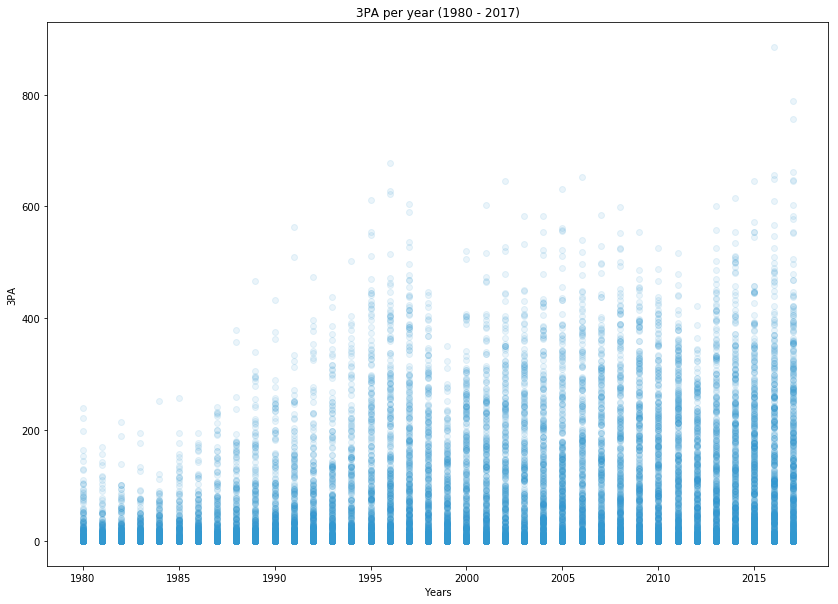

In [12]:
# Plot all 3PA per year
attemps = filtered_data['year']
total = filtered_data['3PA']

print('Total shots: {}'.format(filtered_data['3PA'].sum()))
print('Average per player/season: {} over {} seasons'.format(round(filtered_data['3PA'].mean(), 1), 
                                                     filtered_data['year'].nunique()))

plt.figure(figsize=plot_size)
plt.scatter(attemps, total, color = blue, alpha = 0.1)
plt.xlabel('Years')
plt.ylabel('3PA')
plt.title('3PA per year (1980 - 2017)')
plt.show()

### Total 3PA,  3P and 3P% made per year

In [13]:
# Average 3PA & 3P per player and season
average_shoots_season = filtered_data.groupby(['year']).agg({'3PA':'sum', '3P':'sum'})

In [14]:
average_shoots_season['3P%'] = round(average_shoots_season['3PA'] / average_shoots_season['3P'], 2) * 10

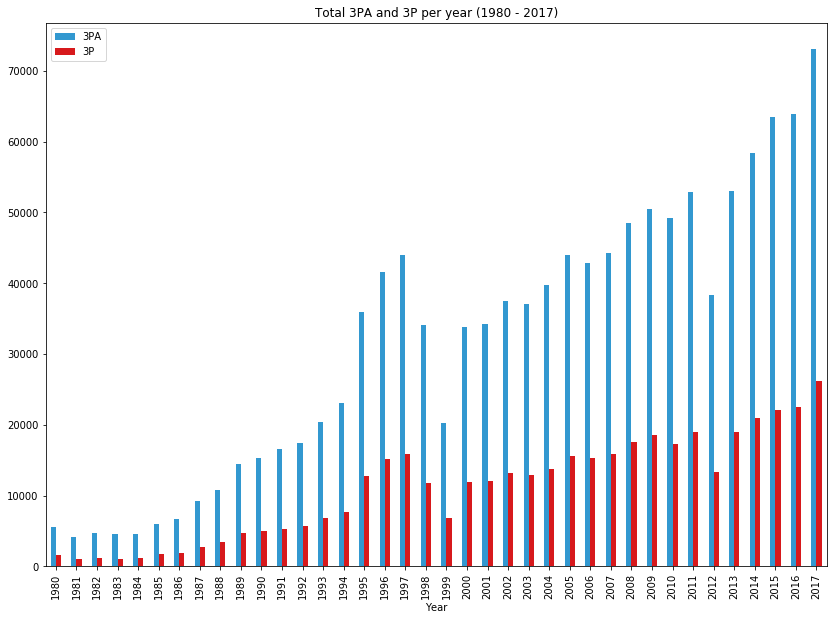

In [15]:
# Plot: total 3PA and 3P per year
total_threes = average_shoots_season[['3PA', '3P']]
total_threes.plot.bar(color = base_color, figsize=plot_size)
plt.xlabel('Year')
plt.title('Total 3PA and 3P per year (1980 - 2017)')
plt.show()

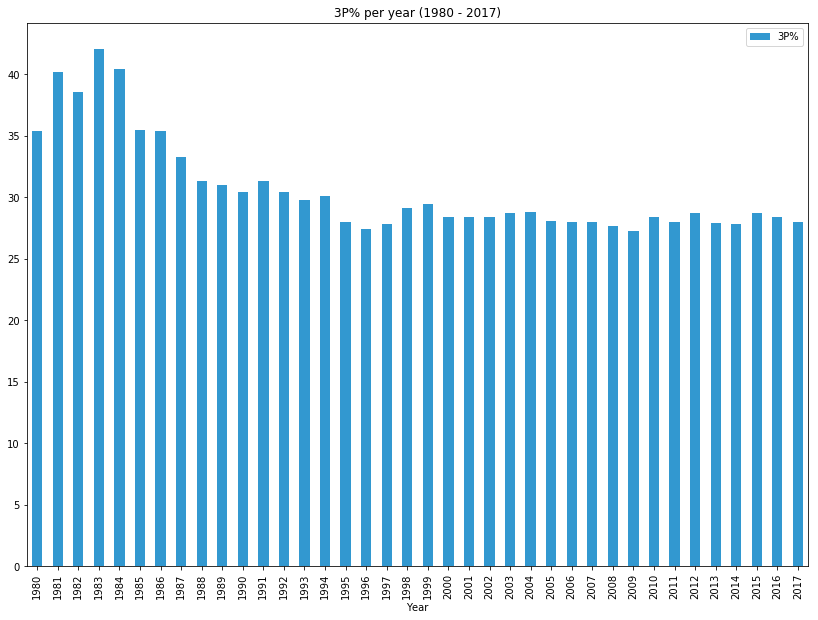

In [16]:
# Plot: 3P% over time
percentage_threes = average_shoots_season[['3P%']]
percentage_threes.plot.bar(color = base_color, figsize=plot_size)
plt.xlabel('Year')
plt.title('3P% per year (1980 - 2017)')
plt.show()

### Dataset: Players 3P statistics per year

In [17]:
# Players by 3PA average
players_all_attemps = filtered_data.groupby(['Player']).agg({'3PA':'sum', 
                                                             '3P':'sum', 
                                                             'year':'count', 
                                                             'PTS':'sum'})

players_all_attemps['3PA_per_season'] = round(players_all_attemps['3PA'] / players_all_attemps['year'], 2)
players_all_attemps['3P%_career'] = (round(players_all_attemps['3PA'] / players_all_attemps['3P'], 2)) * 10

players_all_attemps = players_all_attemps.sort_values(by = '3PA', ascending = False)

In [18]:
players_all_attemps = players_all_attemps.fillna(0)

In [19]:
print(players_all_attemps.head())
print(players_all_attemps.tail())

                 3PA    3P  year    PTS  3PA_per_season  3P%_career
Player                                                             
Ray Allen       7962  3174    20  26218          398.10        25.1
Reggie Miller*  6486  2560    18  25279          360.33        25.3
Tim Hardaway    6349  2251    21  20339          302.33        28.2
Jamal Crawford  6255  2191    19  19364          329.21        28.5
Jason Kidd      6178  2168    23  18992          268.61        28.5
                  3PA  3P  year  PTS  3PA_per_season  3P%_career
Player                                                          
Phil Zevenbergen    0   0     1   30             0.0         0.0
John Edwards        0   0     2   99             0.0         0.0
John Garris         0   0     1  131             0.0         0.0
John Gianelli       0   0     1   55             0.0         0.0
Mike Higgins        0   0     4   44             0.0         0.0


Average 3PA: 44.0
Average 3P: 148.0


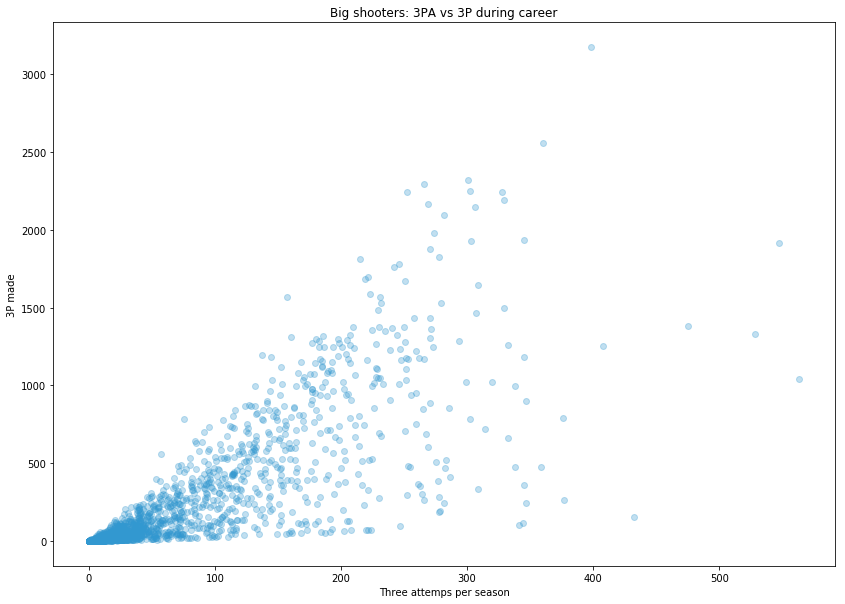

In [20]:
# Plot: Big shooters
average_3PA = players_all_attemps['3PA_per_season'].mean()
average_3P = players_all_attemps['3P'].mean()

print('Average 3PA: {}'.format(round(average_3PA), 2))
print('Average 3P: {}'.format(round(average_3P), 2))

x_big = players_all_attemps['3PA_per_season']
y_big = players_all_attemps['3P']

plt.figure(figsize=plot_size)
plt.scatter(x_big, y_big, color = blue, alpha = 0.3)
plt.title('Big shooters: 3PA vs 3P during career')
plt.xlabel('Three attemps per season')
plt.ylabel('3P made')

plt.show()

# Model: Clustering players

In [21]:
from sklearn.cluster import KMeans

In [22]:
df = players_all_attemps.sort_values(by='3P', ascending=False)
print(df.count())
df.head(5)

3PA               2835
3P                2835
year              2835
PTS               2835
3PA_per_season    2835
3P%_career        2835
dtype: int64


,3PA,3P,year,PTS,3PA_per_season,3P%_career
Player,,,,,,
Ray Allen,7962,3174,20,26218,398.10,25.1
Reggie Miller*,6486,2560,18,25279,360.33,25.3
Kyle Korver,5409,2322,18,11713,300.50,23.3
Vince Carter,6119,2292,23,27463,266.04,26.7
Tim Hardaway,6349,2251,21,20339,302.33,28.2


In [23]:
# Replace inf values with nan
df['3P%_career'] = df['3P%_career'].replace([np.inf, -np.inf], np.nan)

# Drop Na values
df = df.dropna()

In [24]:
print(df.count())
df.sample(10)

3PA               2385
3P                2385
year              2385
PTS               2385
3PA_per_season    2385
3P%_career        2385
dtype: int64


,3PA,3P,year,PTS,3PA_per_season,3P%_career
Player,,,,,,
Stephane Lasme,0,0,3,166,0.00,0.0
Cedric Ball,0,0,1,8,0.00,0.0
Brandon Armstrong,75,25,3,239,25.00,30.0
Brandon Jennings,3022,1035,12,8637,251.83,29.2
Oliver Robinson,11,1,1,101,11.00,110.0
David Robinson*,100,25,14,20790,7.14,40.0
Brandon Bass,58,12,12,6575,4.83,48.3
Drazen Petrovic*,648,278,6,5084,108.00,23.3
Karl Malone*,310,85,19,36928,16.32,36.5


# Kmeans classification

In [25]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

# Using only 3P made to classify
X = df[['3PA', '3P', 'year', '3PA_per_season', '3P%_career']]

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
# Create new group with values
df['group'] = clusters.predict(X)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2385 entries, Ray Allen to Mike Higgins
Data columns (total 7 columns):
3PA               2385 non-null int32
3P                2385 non-null int32
year              2385 non-null int64
PTS               2385 non-null int32
3PA_per_season    2385 non-null float64
3P%_career        2385 non-null float64
group             2385 non-null int32
dtypes: float64(2), int32(4), int64(1)
memory usage: 111.8+ KB


In [28]:
df.group = df.group.astype('category', ordered = False, categories = range(0, n))

/Users/cmserna/miniconda3/envs/clinical-trials/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [29]:
df.group.unique()

[3, 5, 0, 2, 4, 1]
Categories (6, int64): [3, 5, 0, 2, 4, 1]

In [30]:
group_0 = df[(df['group'] == 0)]
group_1 = df[(df['group'] == 1)]
group_2 = df[(df['group'] == 2)]
group_3 = df[(df['group'] == 3)]
group_4 = df[(df['group'] == 4)]
group_5 = df[(df['group'] == 5)]

In [31]:
h = 25

print('\n------------')
print('Group 0: {} players'.format(group_0.describe()))
print(group_0.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 1: {} players'.format(group_1.describe()))
print(group_1.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 2: {} players'.format(group_2.describe()))
print(group_2.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 3: {} players'.format(group_3.describe()))
print(group_3.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 4: {} players'.format(group_4.describe()))
print(group_4.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 5: {} players'.format(group_5.describe()))
print(group_5.sort_values(by='3P', ascending=False).head(h))


------------
Group 0:                3PA           3P        year           PTS  3PA_per_season  \
count   117.000000   117.000000  117.000000    117.000000      117.000000   
mean   2319.683761   839.615385   13.709402   9909.615385      185.157009   
std     318.204978   128.116249    4.089642   4694.507537       67.149369   
min    1823.000000   538.000000    5.000000   3717.000000       75.290000   
25%    2030.000000   737.000000   11.000000   6839.000000      142.670000   
50%    2330.000000   844.000000   14.000000   8483.000000      170.920000   
75%    2592.000000   943.000000   16.000000  11972.000000      211.100000   
max    2875.000000  1090.000000   31.000000  29779.000000      563.400000   

       3P%_career  
count  117.000000  
mean    27.790598  
std      2.360742  
min     22.600000  
25%     26.200000  
50%     27.400000  
75%     29.200000  
max     37.500000   players
                  3PA    3P  year    PTS  3PA_per_season  3P%_career group
Player              

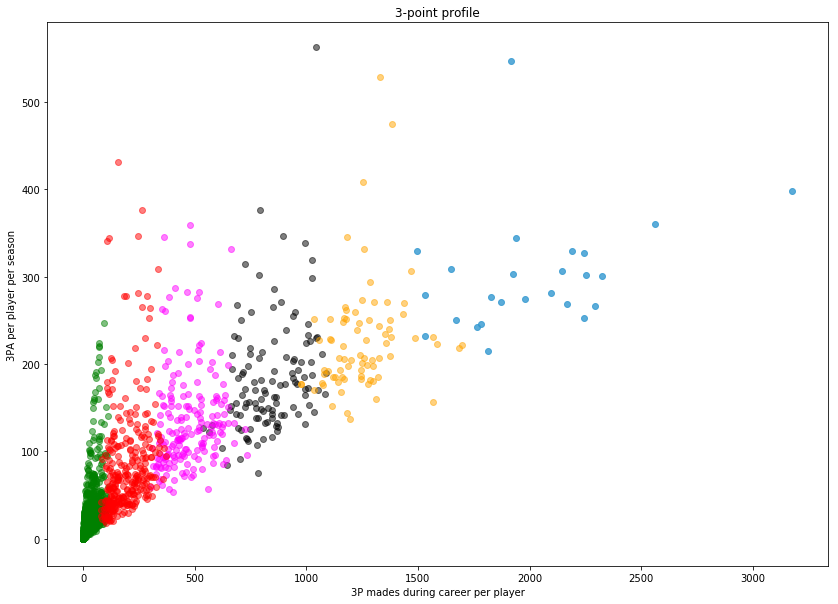

In [50]:
'''
Variables in the model:
3PA', '3P', 'year', '3PA_per_season', '3P%_career'
'''

plt.figure(figsize=plot_size)

a = '3P'
b = '3PA_per_season'
h = 0.5
h_top = 0.8

plt.scatter(group_0[a], group_0[b], c='black', alpha=h)
plt.scatter(group_1[a], group_1[b], c='green', alpha=h)
plt.scatter(group_2[a], group_2[b], c='magenta', alpha=h)
plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(group_4[a], group_4[b], c='red', alpha=h)
plt.scatter(group_5[a], group_5[b], c='orange', alpha=h)

plt.title('3-point profile')
plt.xlabel('3P mades during career per player')
plt.ylabel('3PA per player per season')

plt.xscale('linear')
plt.yscale('linear')

plt.show()

### Plotting top 3P scorers

In [77]:
'''
50 players with more 3P
'''

top_shooters = df.sort_values(by='3P', ascending=False)
top_shooters = top_shooters[0:50]

               3PA           3P       year           PTS  3PA_per_season  \
count    50.000000    50.000000  50.000000     50.000000       50.000000   
mean   4570.940000  1715.140000  17.340000  16768.280000      274.729400   
std    1052.981257   406.977762   3.863011   5927.119936       79.470561   
min    3171.000000  1297.000000   6.000000   7154.000000      156.930000   
25%    3746.250000  1373.750000  15.000000  12453.500000      229.682500   
50%    4337.000000  1578.000000  18.000000  15700.000000      261.785000   
75%    5166.750000  1934.250000  19.000000  19348.750000      302.697500   
max    7962.000000  3174.000000  27.000000  33643.000000      547.380000   

       3P%_career  
count    50.00000  
mean     26.73200  
std       1.99084  
min      22.80000  
25%      25.32500  
50%      26.70000  
75%      28.10000  
max      31.40000  


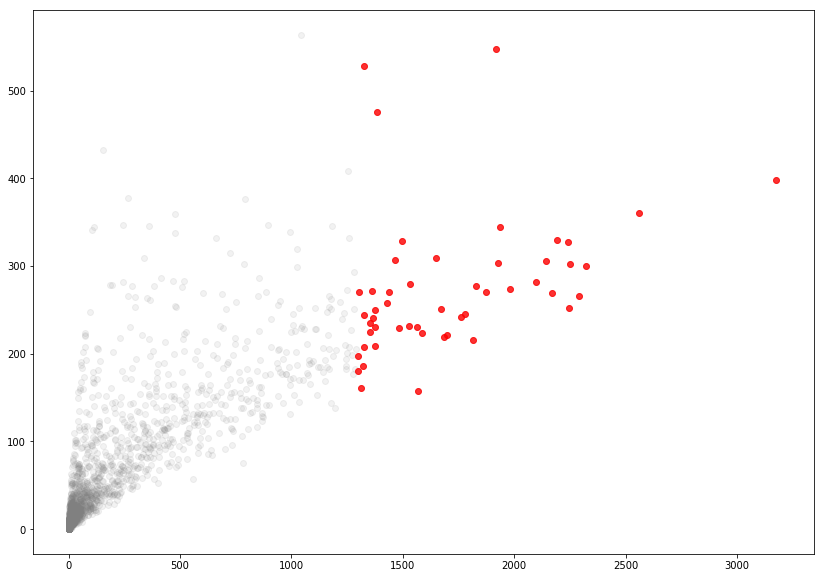

In [79]:
print(top_shooters.describe())

plt.figure(figsize=plot_size)
# plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(df[a], df[b], c='gray', alpha=0.1)
plt.scatter(top_shooters[a], top_shooters[b], c='r', alpha=0.8)

## Analysis: Years experience
- Create datasets to classify rookies; players with 3 years; between 3-5 years of experience

In [34]:
'''
Rookies dataset: 2385 players
'''
names = []
for i in df.index:
    names.append(i)
    
len(names)


2385

In [ ]:
'''
Search: Get only first appearance of a name/record/year in a pandas dataframe
'''



# Curry vs. Allen

In [218]:
# Curry vs Allen
curry = df[df.year == "Stephen Curry"]
allen = df[df.index == "Ray Allen"]

In [219]:
curry

,3PA,3P,year,PTS,3PA_per_season,3P%_career,group
Player,,,,,,,
Stephen Curry,4379,1917,8,13088,547.38,22.8,3
